<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 2</span>
# <span style="color:green">Basic Types of Networks</span>

<span style="font-size:large;">
    
* Undirected and Directed Networks
    
* Simple, Multi-Linked Networks (or Multigraphs) and Weighted Networks

* Complete Networks, Regular Graphs and Trees

* Two-Mode Networks (or Bipartite Graphs)

* Types of Connectedness

* Network Density (Transitivity and Reciprocity)

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import numpy as np
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph

### 1. Undirected Simple Graphs

#### 1.1 Erdos-Renyi Random Undirected Graph

In [2]:
nodes=random.randint(47,52)
p=random.uniform(0.05,0.08)
name="Erdos-Renyi random graph"
G=nx.erdos_renyi_graph(nodes,p)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes, p=%.3f and %i edges\n" %(str(G),len(G.nodes()),p,len(G.edges()))

Graph G is a Erdos-Renyi random graph with 52 nodes, p=0.061 and 79 edges



In [3]:
if G.is_multigraph()==True:
    print "G is a multigraph"
else:
    print "G is a simple graph"
if nx.is_weighted(G)==True:
    print "G is a weighted graph"
else:
    print "G is an unweighted graph"
if G.is_directed()==True:
    print "G is a directed graph"
else:
    print "G is an undirected graph"    
if nx.is_bipartite(G)==True:
    print "G is a bipartite graph"
else:
    print "G is not a bipartite graph"    
if nx.is_tree(G)==True:
    print "G is a tree"
else:
    print "G is not a tree"    
if G.is_directed()==False:
    if nx.is_connected(G)==True:
        print "G is a connected graph"
    else:
        print "G is a disconnected graph and it has",nx.number_connected_components(G),"connected components"    
else:
    if nx.is_strongly_connected(G)==True:
        print "G is a strongly connected graph"
    else:
        print "G is not strongly connected and it has",nx.number_strongly_connected_components(G),"strongly connected components"
    if nx.is_weakly_connected(G)==True:
        print "G is a weakly connected graph"
    else:
        print "G is not weakly connected and it has",nx.number_weakly_connected_components(G),"weakly connected components"    
if len(list(nx.isolates(G)))>0:
    print "G has",len(list(nx.isolates(G))),"isolates"
else:
    print "G has no isolates"

G is a simple graph
G is an unweighted graph
G is an undirected graph
G is not a bipartite graph
G is not a tree
G is a disconnected graph and it has 4 connected components
G has 3 isolates


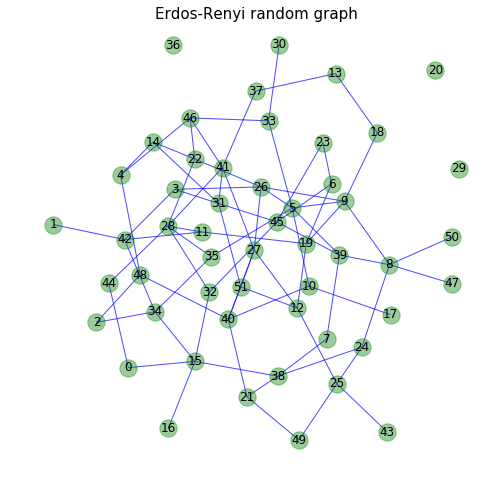

In [4]:
pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

#### 1.2 Gnm Random Undirected Graph

In [5]:
nodes=random.randint(47,52)
edges=random.randint(70,80)
name="Gnm random graph"
G=nx.gnm_random_graph(nodes,edges)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes and %i edges\n" %(str(G),len(G.nodes()),len(G.edges()))

Graph G is a Gnm random graph with 52 nodes and 80 edges



In [6]:
# Copy, paste and run cell 3 here:



In [7]:
# Copy, paste and run cell 4 here:



#### 1.3 Strogatz-Watts Small-World Graph

In [8]:
nodes=random.randint(47,52)
k=random.randint(5,8) #Each node is joined with its k nearest neighbors in a ring topology
p=random.uniform(0.7,0.8) #rewiring probability
name="Strogatz-Watts graph"
G=nx.watts_strogatz_graph(nodes, k, p)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes, k=%i, p=%.2f and %i edges\n" %(str(G),len(G.nodes()),k,p,len(G.edges()))

Graph G is a Strogatz-Watts graph with 51 nodes, k=7, p=0.72 and 153 edges



In [9]:
# Copy, paste and run cell 3 here:



In [10]:
# Copy, paste and run cell 4 here:



#### 1.4 Barabasi-Albert Preferential Attachment Graph

In [11]:
n=random.randint(47,52) #no of nodes
m=random.randint(3,6) #Number of edges to attach from a new node to existing nodes
name="Barabasi-Albert graph"
G=nx.barabasi_albert_graph(n, m)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes, m=%i and %i edges\n" %(str(G),len(G.nodes()),m,len(G.edges()))

Graph G is a Barabasi-Albert graph with 50 nodes, m=5 and 225 edges



In [12]:
# Copy, paste and run cell 3 here:



In [13]:
# Copy, paste and run cell 4 here:



#### 1.5 Random Regular Graph

In [14]:
while True:
    n=random.randint(47,52) #no of nodes
    d=random.randint(5,8) #the common degree of nodes
    if n*d%2==0:
        break
name="Random regular graph"
G=nx.random_regular_graph(d, n)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes, d=%i and %i edges\n" %(str(G),len(G.nodes()),d,len(G.edges()))

Graph G is a Random regular graph with 52 nodes, d=5 and 130 edges



In [15]:
# Copy, paste and run cell 3 here:



In [16]:
# Copy, paste and run cell 4 here:



### 2. Directed Simple Graphs

#### 2.1 Erdos-Renyi Random Directed Graph

In [17]:
nodes=random.randint(37,42)
p=random.uniform(0.05,0.08)
name="Erdos-Renyi random graph"
G=nx.erdos_renyi_graph(nodes,p,directed=True)
G=nx.DiGraph(G,name=name)
print "Directed graph G is a %s with %i nodes, p=%.3f and %i edges\n" %(str(G),len(G.nodes()),p,len(G.edges()))

Directed graph G is a Erdos-Renyi random graph with 41 nodes, p=0.055 and 107 edges



In [18]:
# Copy, paste and run cell 3 here:



In [19]:
# Copy, paste and run cell 4 here:



#### 2.2 Gnm Random Directed Graph

In [20]:
nodes=random.randint(37,42)
edges=random.randint(70,80)
name="Gnm random graph"
G=nx.gnm_random_graph(nodes,edges)
G=nx.DiGraph(G,name=name)
print "Directed graph G is a %s with %i nodes and %i edges" %(str(G),len(G.nodes()),len(G.edges()))

Directed graph G is a Gnm random graph with 38 nodes and 140 edges


In [21]:
# Copy, paste and run cell 3 here:



In [22]:
# Copy, paste and run cell 4 here:



### 3. Bipartite Graphs

In [23]:
n = random.randint(10,15)   #nodes of the first partition
m = random.randint(10,15)   #nodes of the second partition
p=random.uniform(0.1,0.2)   #probability of edge existence
name="Bipartite random graph"
alls=[]
for y in range(n,n+m):
    for x in range(n):
        alls.append((x,y))
eds=random.sample(alls,int(p*len(alls)))
G=nx.Graph()
G.add_edges_from(eds)
G=nx.Graph(G,name=name)
X=[z for z in G.nodes() if z in range(n)]
Y=[z for z in G.nodes() if z in range(n,n+m)]
print "Graph G is a %s with %i nodes (%i nodes in the first partition, %i nodes in the second partition), p=%.2f and %i edges\n" %(str(G),len(G.nodes()),len(X),len(Y),p,len(G.edges()))

Graph G is a Bipartite random graph with 22 nodes (10 nodes in the first partition, 12 nodes in the second partition), p=0.18 and 28 edges



In [24]:
# Copy, paste and run cell 3 here:



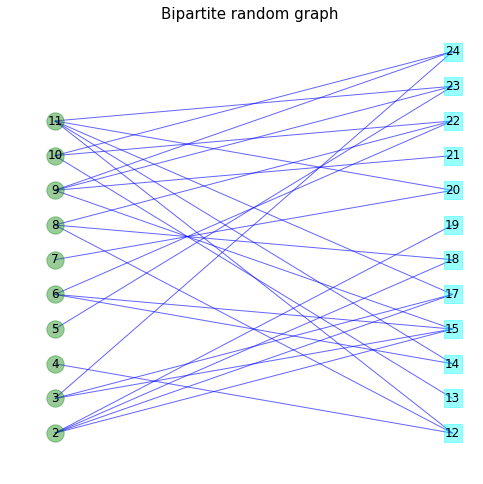

In [25]:
pos={}
for i,x in list(enumerate(X)):
    pos[x]=(0,i)
for j,y in list(enumerate(Y)):
    pos[y]=(1,j)
plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=list(X), node_shape='o', node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=list(Y), node_shape='s', node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

### 4. Trees

#### 4.1 Balanced Tree

In [26]:
r=random.randint(2,3) #number of children of each node
h=random.randint(2,4) #number of generations (height)
name="Balanced tree"
G=nx.balanced_tree(r, h)
G=nx.Graph(G,name=name)
print "Tree G is a %s with %i nodes, r=%i, h=%i and %i edges" %(str(G),len(G.nodes()),r,h,len(G.edges()))

Tree G is a Balanced tree with 15 nodes, r=2, h=3 and 14 edges


In [27]:
# Copy, paste and run cell 3 here:



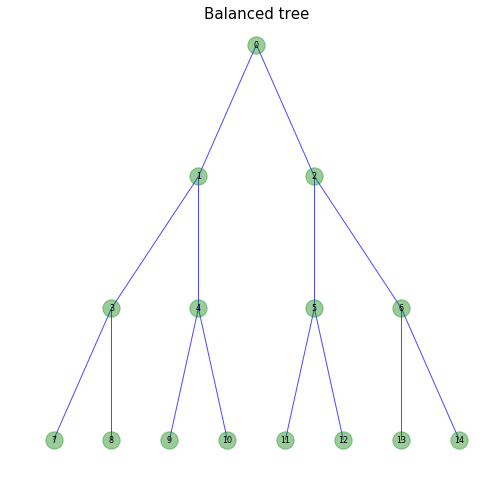

In [28]:
plt.figure(figsize=(8,8));
pos=graphviz_layout(G, prog='dot') #, args="-Grankdir=LR")
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(G, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(G, pos,font_size=8)
plt.axis('off');
plt.title(name,fontsize=15);

#### 4.2 Random Power Law Tree

In [29]:
n=random.randint(25,35) #number of nodes
name="Random power law tree"
G=nx.random_powerlaw_tree(n,tries=1000)
G=nx.Graph(G,name=name)
print "Tree G is a %s with %i nodes and %i edges" %(str(G),len(G.nodes()),len(G.edges()))

Tree G is a Random power law tree with 29 nodes and 28 edges


In [30]:
# Copy, paste and run cell 3 here:



In [31]:
# Copy, paste and run cell 28 here:



### 5. Weighted Graphs

#### Function alocating randomly integer weights on edges of a graph

In [32]:
def weight_attr(G,maxw):
    # G is a graph
    # maxw is a positive integer (maximum weight value)
    weight={}
    for edge in G.edges():
        ed=edge[0]
        de=edge[1]
        G[ed][de]['weight']=random.randrange(1,maxw)
        weight[(ed,de)]=G[ed][de]['weight']
    return weight

#### 5.1 Erdos-Renyi Random Weighted Graph

In [33]:
nodes=random.randint(47,52)
p=random.uniform(0.05,0.08)
name="Erdos-Renyi random weighted graph"
G=nx.erdos_renyi_graph(nodes,p)
maxw=random.randint(7,12)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes, p=%.3f and %i edges\n" %(str(G),len(G.nodes()),p,len(G.edges()))

res = list(sorted(Counter(G.edges()), key=Counter(G.edges()).__getitem__, reverse=True))
for i in res:
    print "Edge", i, "has weight", Counter(G.edges())[i]['weight']

Graph G is a Erdos-Renyi random weighted graph with 51 nodes, p=0.054 and 68 edges

Edge (4, 38) has weight 11
Edge (30, 31) has weight 11
Edge (1, 34) has weight 10
Edge (10, 17) has weight 10
Edge (26, 39) has weight 10
Edge (35, 47) has weight 10
Edge (42, 46) has weight 10
Edge (38, 39) has weight 10
Edge (24, 49) has weight 10
Edge (1, 18) has weight 10
Edge (0, 14) has weight 9
Edge (23, 50) has weight 9
Edge (8, 20) has weight 9
Edge (23, 26) has weight 9
Edge (16, 25) has weight 9
Edge (27, 40) has weight 9
Edge (20, 50) has weight 9
Edge (15, 17) has weight 9
Edge (13, 27) has weight 9
Edge (15, 50) has weight 8
Edge (1, 15) has weight 8
Edge (13, 20) has weight 8
Edge (2, 39) has weight 8
Edge (6, 27) has weight 8
Edge (36, 39) has weight 7
Edge (6, 17) has weight 7
Edge (14, 42) has weight 7
Edge (25, 36) has weight 7
Edge (30, 38) has weight 7
Edge (11, 21) has weight 7
Edge (28, 44) has weight 7
Edge (15, 38) has weight 6
Edge (11, 26) has weight 6
Edge (5, 45) has weight 

In [34]:
# Copy, paste and run cell 3 here:



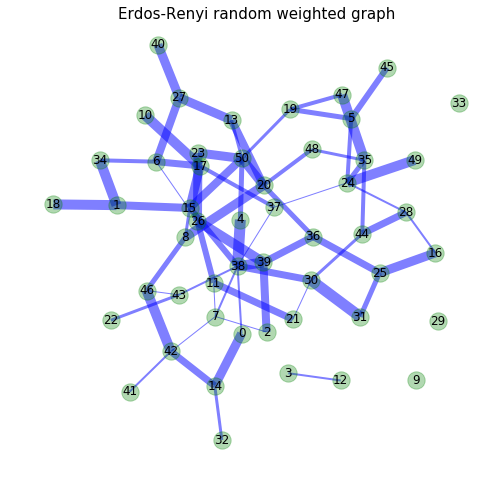

In [35]:
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

#### 5.2 Gnm Random Weighted  Graph

In [36]:
nodes=random.randint(47,52)
edges=random.randint(70,80)
name="Gnm random weighted graph"
G=nx.gnm_random_graph(nodes,edges)
maxw=random.randint(7,12)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)
G=nx.Graph(G,name=name)
print "Graph G is a %s with %i nodes and %i edges\n" %(str(G),len(G.nodes()),len(G.edges()))

res = list(sorted(Counter(G.edges()), key=Counter(G.edges()).__getitem__, reverse=True))
for i in res:
    print "Edge", i, "has weight", Counter(G.edges())[i]['weight']

Graph G is a Gnm random weighted graph with 51 nodes and 73 edges

Edge (10, 17) has weight 10
Edge (31, 44) has weight 10
Edge (3, 48) has weight 10
Edge (9, 33) has weight 10
Edge (0, 44) has weight 10
Edge (15, 22) has weight 10
Edge (33, 38) has weight 10
Edge (12, 29) has weight 10
Edge (5, 16) has weight 10
Edge (29, 37) has weight 10
Edge (41, 46) has weight 9
Edge (13, 24) has weight 9
Edge (41, 48) has weight 9
Edge (26, 30) has weight 9
Edge (17, 38) has weight 8
Edge (9, 44) has weight 8
Edge (16, 24) has weight 8
Edge (17, 28) has weight 8
Edge (6, 15) has weight 8
Edge (45, 47) has weight 8
Edge (10, 45) has weight 8
Edge (0, 13) has weight 8
Edge (6, 32) has weight 7
Edge (8, 28) has weight 7
Edge (36, 45) has weight 7
Edge (6, 47) has weight 6
Edge (8, 10) has weight 6
Edge (12, 35) has weight 6
Edge (43, 45) has weight 6
Edge (0, 25) has weight 6
Edge (31, 46) has weight 6
Edge (6, 45) has weight 6
Edge (3, 26) has weight 6
Edge (4, 29) has weight 6
Edge (15, 16) has we

In [37]:
# Copy, paste and run cell 3 here:



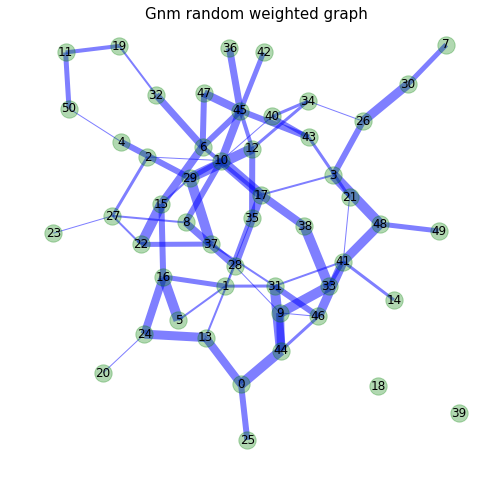

In [38]:
# Copy, paste and run cell 35 here:

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

### 6. Multigraphs

#### Function adding randomly multiple edges of a graph

In [39]:
def add_multiedges(G,k):
    # E is a list of edges
    # k is a positive integer for the edges to be added in parallen to existing ones 
    edges = list(G.edges())
    for _ in range(k):
        e=random.choice(list(E))
        edges.append(e)
    Gm = nx.MultiGraph()
    Gm.add_edges_from(edges)
    return Gm

#### 6.1 Gnm Random Multigraph

In [40]:
nodes=random.randint(17,22)
edges=random.randint(35,45)
name="Gnm random multigraph"
G=nx.gnm_random_graph(nodes,edges)
E=G.edges()
k=random.randint(50,60)
G=add_multiedges(G,k)
G=nx.MultiGraph(G,name=name)
print "Graph G is a %s with %i nodes and %i edges\n" %(str(G),len(G.nodes()),len(G.edges()))

res = list(sorted(Counter(G.edges()), key=Counter(G.edges()).__getitem__, reverse=True))
for i in res:
    print "Edge", i, "appears", Counter(G.edges())[i], "times" 

Graph G is a Gnm random multigraph with 19 nodes and 89 edges

Edge (3, 14) appears 5 times
Edge (9, 15) appears 5 times
Edge (7, 12) appears 4 times
Edge (5, 8) appears 4 times
Edge (3, 15) appears 3 times
Edge (4, 18) appears 3 times
Edge (1, 14) appears 3 times
Edge (13, 16) appears 3 times
Edge (8, 15) appears 3 times
Edge (4, 10) appears 3 times
Edge (0, 5) appears 3 times
Edge (10, 16) appears 3 times
Edge (5, 9) appears 2 times
Edge (0, 7) appears 2 times
Edge (1, 15) appears 2 times
Edge (7, 11) appears 2 times
Edge (6, 10) appears 2 times
Edge (0, 17) appears 2 times
Edge (0, 14) appears 2 times
Edge (15, 17) appears 2 times
Edge (7, 14) appears 2 times
Edge (2, 6) appears 2 times
Edge (1, 13) appears 2 times
Edge (4, 16) appears 2 times
Edge (5, 15) appears 2 times
Edge (2, 17) appears 2 times
Edge (7, 9) appears 2 times
Edge (9, 13) appears 2 times
Edge (12, 15) appears 2 times
Edge (6, 13) appears 2 times
Edge (0, 9) appears 2 times
Edge (14, 15) appears 2 times
Edge (14, 1

In [41]:
# Copy, paste and run cell 3 here:



#### Plotting the multigraph as a weighted graph

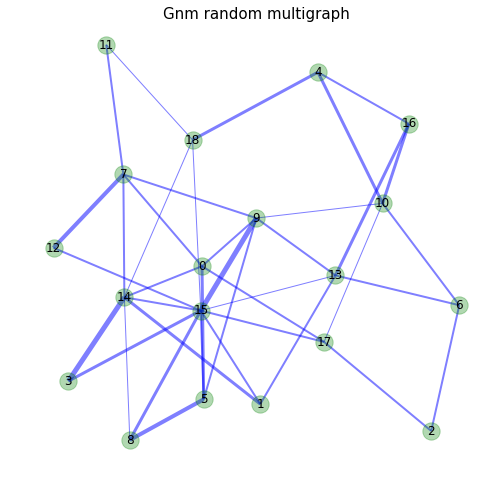

In [42]:
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items()]
G = nx.Graph(weight)
edge_width=[G[u][v]['weight'] for u,v in G.edges()]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

#### 6.2 Erdos-Renyi Random Multigraph

In [43]:
nodes=random.randint(27,32)
p=random.uniform(0.05,0.07)
name="Erdos-Renyi random multigraph"
G=nx.erdos_renyi_graph(nodes,p)
E=G.edges()
k=random.randint(50,60)
G=add_multiedges(G,k)
G=nx.MultiGraph(G,name=name)
print "Graph G is a %s with %i nodes, p=%.3f and %i edges\n" %(str(G),len(G.nodes()),p,len(G.edges()))

res = list(sorted(Counter(G.edges()), key=Counter(G.edges()).__getitem__, reverse=True))
for i in res:
    print "Edge", i, "appears", Counter(G.edges())[i], "times" 

Graph G is a Erdos-Renyi random multigraph with 21 nodes, p=0.069 and 73 edges

Edge (7, 26) appears 8 times
Edge (5, 8) appears 6 times
Edge (2, 19) appears 6 times
Edge (4, 6) appears 6 times
Edge (24, 26) appears 4 times
Edge (1, 4) appears 4 times
Edge (2, 11) appears 4 times
Edge (6, 21) appears 3 times
Edge (5, 18) appears 3 times
Edge (4, 10) appears 3 times
Edge (1, 24) appears 3 times
Edge (8, 11) appears 3 times
Edge (2, 24) appears 3 times
Edge (21, 25) appears 3 times
Edge (14, 17) appears 2 times
Edge (4, 19) appears 2 times
Edge (12, 13) appears 2 times
Edge (5, 24) appears 2 times
Edge (17, 21) appears 2 times
Edge (5, 21) appears 2 times
Edge (16, 21) appears 1 times
Edge (3, 17) appears 1 times


In [44]:
# Copy, paste and run cell 3 here:



#### Plotting the multigraph as a weighted graph

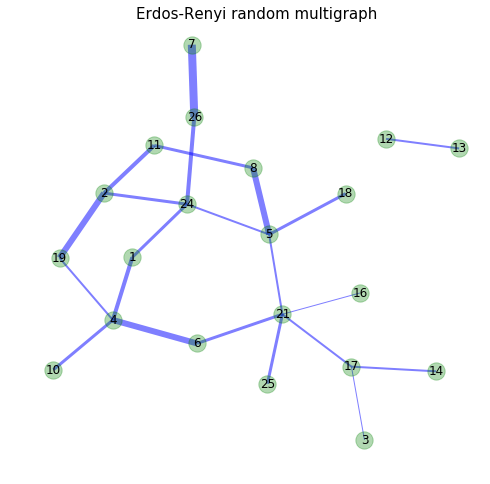

In [45]:
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items()]
G = nx.Graph(weight)
edge_width=[G[u][v]['weight'] for u,v in G.edges()]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);